In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2x1c3RyZS9jb2xsaW5mL21pYXNocy0yLWFkdmFuY2VkLXByb2dyYW1taW5nLXBhcmFsbGVsLWNvbXB1dGluZy0yMDI0LTIwMjUvQ291cnNlcy9Tb2x1dGlvbnM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

{"/opt/conda/lib/python3.12/importlib/_bootstrap.py": 1723143691.0, "/opt/conda/lib/python3.12/importlib/_bootstrap_external.py": 1723143691.0, "/opt/conda/lib/python3.12/zipimport.py": 1723143690.0, "/opt/conda/lib/python3.12/codecs.py": 1723143690.0, "/opt/conda/lib/python3.12/encodings/aliases.py": 1723143691.0, "/opt/conda/lib/python3.12/encodings/__init__.py": 1723143691.0, "/opt/conda/lib/python3.12/encodings/utf_8.py": 1723143691.0, "/opt/conda/lib/python3.12/abc.py": 1723143690.0, "/opt/conda/lib/python3.12/io.py": 1723143690.0, "/opt/conda/lib/python3.12/stat.py": 1723143690.0, "/opt/conda/lib/python3.12/_collections_abc.py": 1723143690.0, "/opt/conda/lib/python3.12/genericpath.py": 1723143690.0, "/opt/conda/lib/python3.12/posixpath.py": 1723143690.0, "/opt/conda/lib/python3.12/os.py": 1723143690.0, "/opt/conda/lib/python3.12/_sitebuiltins.py": 1723143690.0, "/opt/conda/lib/python3.12/encodings/utf_8_sig.py": 1723143691.0, "/opt/conda/lib/python3.12/site-packages/_distutils_ha

In [2]:
from ipyparallel import Client

### Force the 8 nodes/1 core layout
rc = Client()
rc.stop_distributed()
client = rc.become_dask()
client

<Client: 'tcp://10.30.0.190:20917' processes=8 threads=8, memory=32.00 GiB>

In [3]:
from time import sleep


def inc(x):
    sleep(1)
    return x + 1


def add(x, y):
    sleep(1)
    return x + y

In [4]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y) 

CPU times: user 763 μs, sys: 0 ns, total: 763 μs
Wall time: 3 s


In [5]:
import dask


@dask.delayed
def inc(x):
    sleep(1)
    return x + 1


@dask.delayed
def add(x, y):
    sleep(1)
    return x + y

In [6]:
%%time
# This runs immediately, all it does is build a graph

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 300 μs, sys: 0 ns, total: 300 μs
Wall time: 279 μs


In [7]:
%%time
# This actually runs our computation using a local thread pool

z.compute()

CPU times: user 3.64 ms, sys: 0 ns, total: 3.64 ms
Wall time: 2.01 s


5

In [8]:
z

Delayed('add-9417401d-2c96-4a55-baaa-fbffe3f7a566')

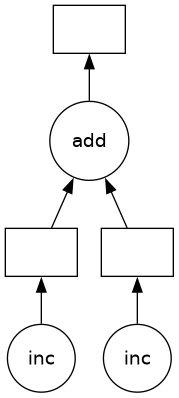

In [9]:
# Look at the task graph for `z`
z.visualize()

In [10]:
data = [1, 2, 3, 4, 5, 6, 7, 8] 

In [11]:
%%time
# Sequential code


def inc(x):
    sleep(1)
    return x + 1


results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: user 3.33 ms, sys: 0 ns, total: 3.33 ms
Wall time: 8 s


In [12]:
total

44

In [13]:
%%time
# Your parallel code here...

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 μs


In [14]:
%%time

@dask.delayed
def inc(x):
    sleep(1)
    return x + 1


results = []
for x in data:
    y = inc(x)
    results.append(y)

total = dask.delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)  # After it's computed

Before computing: Delayed('sum-057d8424-93b1-43e6-b392-e023403cf907')


After computing : 44
CPU times: user 4.58 ms, sys: 0 ns, total: 4.58 ms
Wall time: 1.02 s


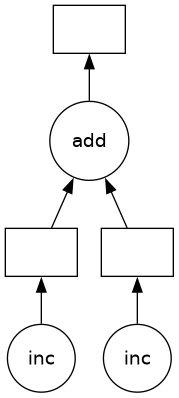

In [15]:
(inc(1) + inc(2)).visualize()

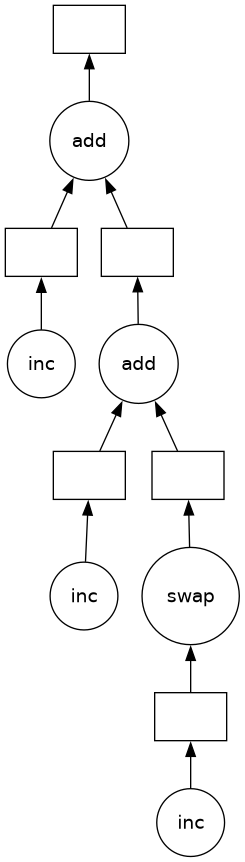

In [16]:
sum([inc(1),inc(2),inc(3)]).visualize()

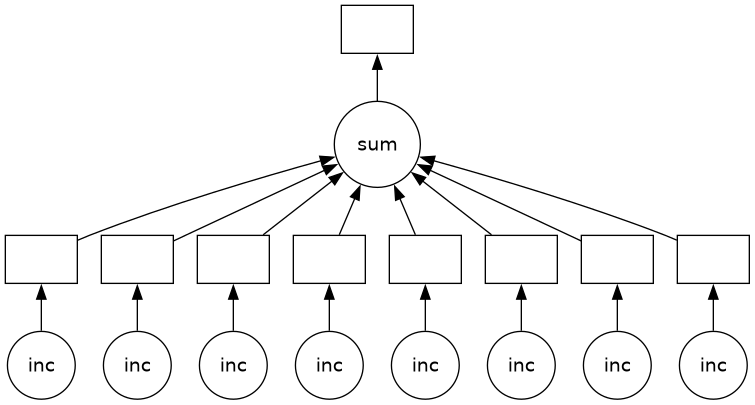

In [17]:
total.visualize()

In [18]:
from dask import delayed, compute
from dask.distributed import Queue, print
from time import sleep

queue = Queue()

@delayed
def produce(queue, n):
    print("producing {} items".format(n))
    for x in range(1, n + 1):
        # simulate i/o operation using sleep
        sleep(1)
        # produce an item
        print("producing {}/{}".format(x, n))
        item = str(x)
        # put the item in the queue
        queue.put(item)

    # indicate the producer is done
    queue.put(None)
    return n

@delayed
def consume(queue):
    consumed = 0
    print("consuming items")
    while True:
        # wait for an item from the producer
        item = queue.get()
        if item is None:
            # the producer emits None to indicate that it is done
            break

        # process the item
        print("consuming {}".format(item))
        consumed += 1
    return consumed

compute(
    produce(queue, 5), 
    consume(queue)
)

(5, 5)

In [19]:
def double(x):
    sleep(1)
    return 2 * x

def inc(x):
    sleep(1)
    return x + 1

def is_even(x):
    return not x % 2


data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [20]:
%%time
# Sequential code

results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

90
CPU times: user 4.46 ms, sys: 134 μs, total: 4.6 ms
Wall time: 10 s


In [21]:
@dask.delayed
def double(x):
    sleep(1)
    return 2 * x

@dask.delayed
def inc(x):
    sleep(1)
    return x + 1

results = []
for x in data:
    if is_even(x):  # even
        y = double(x)
    else:  # odd
        y = inc(x)
    results.append(y)

total = sum(results)

In [22]:
%time total.compute()

CPU times: user 3.56 ms, sys: 71 μs, total: 3.63 ms
Wall time: 2.02 s


90

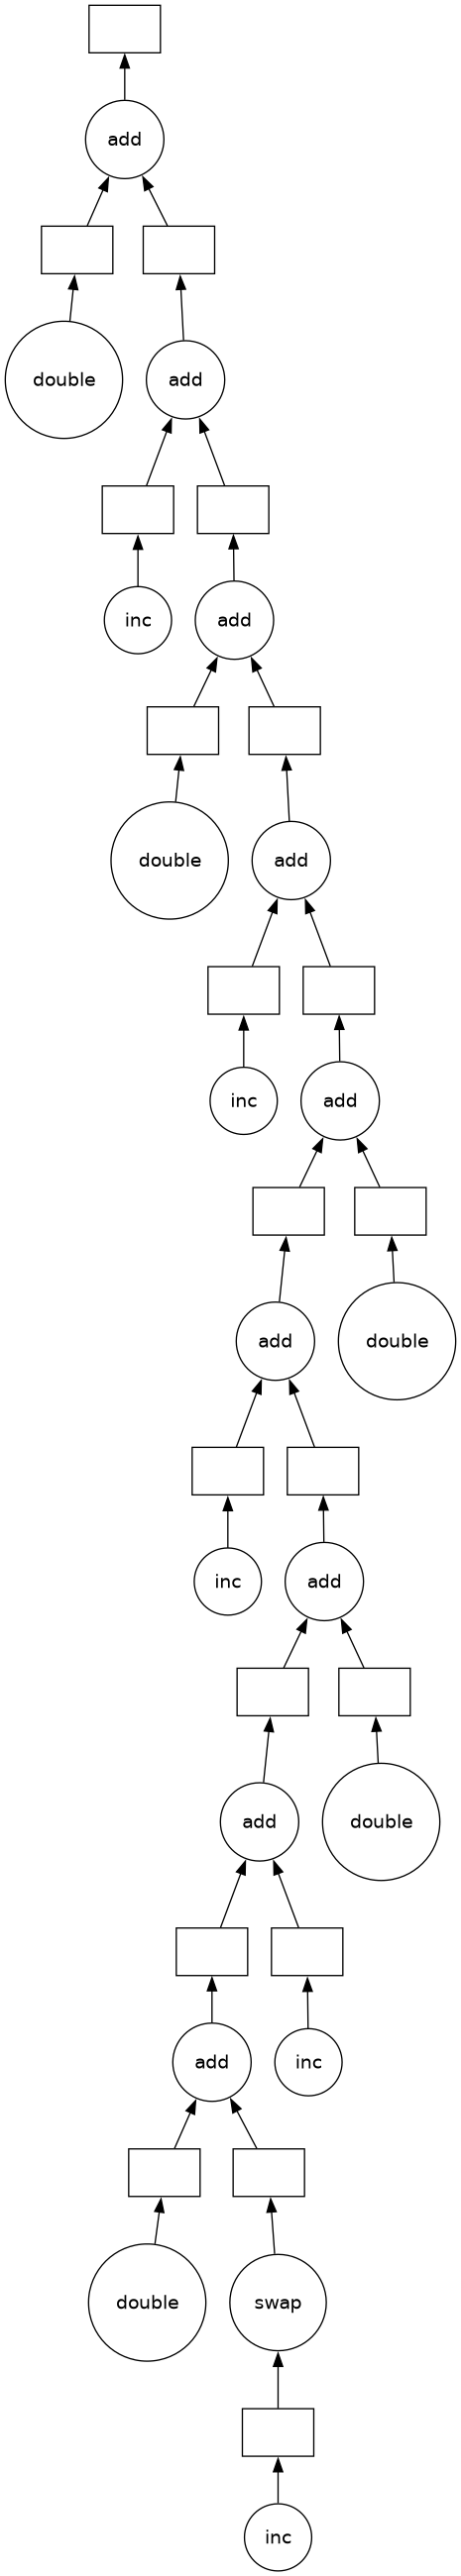

In [23]:
total.visualize()

In [24]:
import os
import requests

os.makedirs("data", exist_ok=True)
code_url = "https://raw.githubusercontent.com/dask/dask-tutorial/main/prep.py"
with open("prep.py", "wb") as f:
    f.write(requests.get(code_url).content)
%run prep.py -d flights

- Downloading NYC Flights dataset... 

done


- Extracting flight data... 

/lustre/collinf/miashs-2-advanced-programming-parallel-computing-2024-2025/Courses/Solutions/prep.py:66: DeprecationWarning:

Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.



done


- Creating json data... 

done


** Created flights dataset! in 5.46s**


In [25]:
sorted(os.listdir(os.path.join("data", "nycflights")))

['1990.csv',
 '1991.csv',
 '1992.csv',
 '1993.csv',
 '1994.csv',
 '1995.csv',
 '1996.csv',
 '1997.csv',
 '1998.csv',
 '1999.csv']

In [26]:
import pandas as pd

df = pd.read_csv(os.path.join("data", "nycflights", "1990.csv"))
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [27]:
# What is the schema?
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
dtype: object

In [28]:
# What originating airports are in the data?
df.Origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [29]:
# Mean departure delay per-airport for one year
df.groupby("Origin").DepDelay.mean()

Origin
EWR     9.168411
JFK    11.857274
LGA     8.560045
Name: DepDelay, dtype: float64

In [30]:
from glob import glob

filenames = sorted(glob(os.path.join("data", "nycflights", "*.csv")))

In [31]:
filenames

['data/nycflights/1990.csv',
 'data/nycflights/1991.csv',
 'data/nycflights/1992.csv',
 'data/nycflights/1993.csv',
 'data/nycflights/1994.csv',
 'data/nycflights/1995.csv',
 'data/nycflights/1996.csv',
 'data/nycflights/1997.csv',
 'data/nycflights/1998.csv',
 'data/nycflights/1999.csv']

In [32]:
%%time

sums = []
counts = []
for fn in filenames:
    # Read in file
    df = pd.read_csv(fn)

    # Groupby origin airport
    by_origin = df.groupby("Origin")

    # Sum of all departure delays by origin
    total = by_origin.DepDelay.sum()

    # Number of flights by origin
    count = by_origin.DepDelay.count()

    # Save the intermediates
    sums.append(total)
    counts.append(count)

# Combine intermediates to get total mean-delay-per-origin
total_delays = sum(sums)
n_flights = sum(counts)
mean = total_delays / n_flights

CPU times: user 3.48 s, sys: 156 ms, total: 3.63 s
Wall time: 4.02 s


In [33]:
mean

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [34]:
%%time

# This is just one possible solution, there are
# several ways to do this using `dask.delayed`


@dask.delayed
def read_file(filename):
    # Read in file
    return pd.read_csv(filename)


sums = []
counts = []
for fn in filenames:
    # Delayed read in file
    df = read_file(fn)

    # Groupby origin airport
    by_origin = df.groupby("Origin")

    # Sum of all departure delays by origin
    total = by_origin.DepDelay.sum()

    # Number of flights by origin
    count = by_origin.DepDelay.count()

    # Save the intermediates
    sums.append(total)
    counts.append(count)

# Combine intermediates to get total mean-delay-per-origin
total_delays = sum(sums)
n_flights = sum(counts)
mean, *_ = dask.compute(total_delays / n_flights)

CPU times: user 12.4 ms, sys: 1.97 ms, total: 14.4 ms
Wall time: 976 ms


In [35]:
# ensure the results still match
mean

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [36]:
dask.compute(sums)

([Origin
  EWR    1062573.0
  JFK     554956.0
  LGA     898351.0
  Name: DepDelay, dtype: float64,
  Origin
  EWR    776235.0
  JFK    389520.0
  LGA    577681.0
  Name: DepDelay, dtype: float64,
  Origin
  EWR    976045.0
  JFK    422302.0
  LGA    659255.0
  Name: DepDelay, dtype: float64,
  Origin
  EWR    1119295.0
  JFK     351783.0
  LGA     617911.0
  Name: DepDelay, dtype: float64,
  Origin
  EWR    1322649.0
  JFK     448715.0
  LGA     765889.0
  Name: DepDelay, dtype: float64,
  Origin
  EWR    948014.0
  JFK    457644.0
  LGA    686691.0
  Name: DepDelay, dtype: float64,
  Origin
  EWR    1548420.0
  JFK     680821.0
  LGA     799150.0
  Name: DepDelay, dtype: float64,
  Origin
  EWR    1250156.0
  JFK     366344.0
  LGA     562100.0
  Name: DepDelay, dtype: float64,
  Origin
  EWR    1295784.0
  JFK     358156.0
  LGA     701016.0
  Name: DepDelay, dtype: float64,
  Origin
  EWR    1432011.0
  JFK     392279.0
  LGA     971872.0
  Name: DepDelay, dtype: float64],)

In [37]:
dask.compute(counts)

([Origin
  EWR    115895
  JFK     46803
  LGA    104947
  Name: DepDelay, dtype: int64,
  Origin
  EWR    112234
  JFK     41832
  LGA    100882
  Name: DepDelay, dtype: int64,
  Origin
  EWR    113801
  JFK     42030
  LGA    101553
  Name: DepDelay, dtype: int64,
  Origin
  EWR    110286
  JFK     41280
  LGA    101122
  Name: DepDelay, dtype: int64,
  Origin
  EWR    112516
  JFK     42243
  LGA     98571
  Name: DepDelay, dtype: int64,
  Origin
  EWR    106398
  JFK     45412
  LGA     96810
  Name: DepDelay, dtype: int64,
  Origin
  EWR    114019
  JFK     42688
  LGA     92367
  Name: DepDelay, dtype: int64,
  Origin
  EWR    118228
  JFK     39246
  LGA     94042
  Name: DepDelay, dtype: int64,
  Origin
  EWR    116028
  JFK     41865
  LGA     91025
  Name: DepDelay, dtype: int64,
  Origin
  EWR    120046
  JFK     43844
  LGA     92948
  Name: DepDelay, dtype: int64],)

In [38]:
%%time

# This is just one possible solution, there are
# several ways to do this using `dask.delayed`


@dask.delayed
def read_file(filename):
    # Read in file
    return pd.read_csv(filename)


sums = []
counts = []
for fn in filenames:
    # Delayed read in file
    df = read_file(fn)

    # Groupby origin airport
    by_origin = df.groupby("Origin")

    # Sum of all departure delays by origin
    total = by_origin.DepDelay.sum()

    # Number of flights by origin
    count = by_origin.DepDelay.count()

    # Save the intermediates
    sums.append(total)
    counts.append(count)

# Combine intermediates to get total mean-delay-per-origin
total_delays = dask.delayed(sum)(sums)
n_flights = dask.delayed(sum)(counts)
mean, *_ = dask.compute(total_delays / n_flights)

CPU times: user 8.54 ms, sys: 959 μs, total: 9.5 ms
Wall time: 801 ms


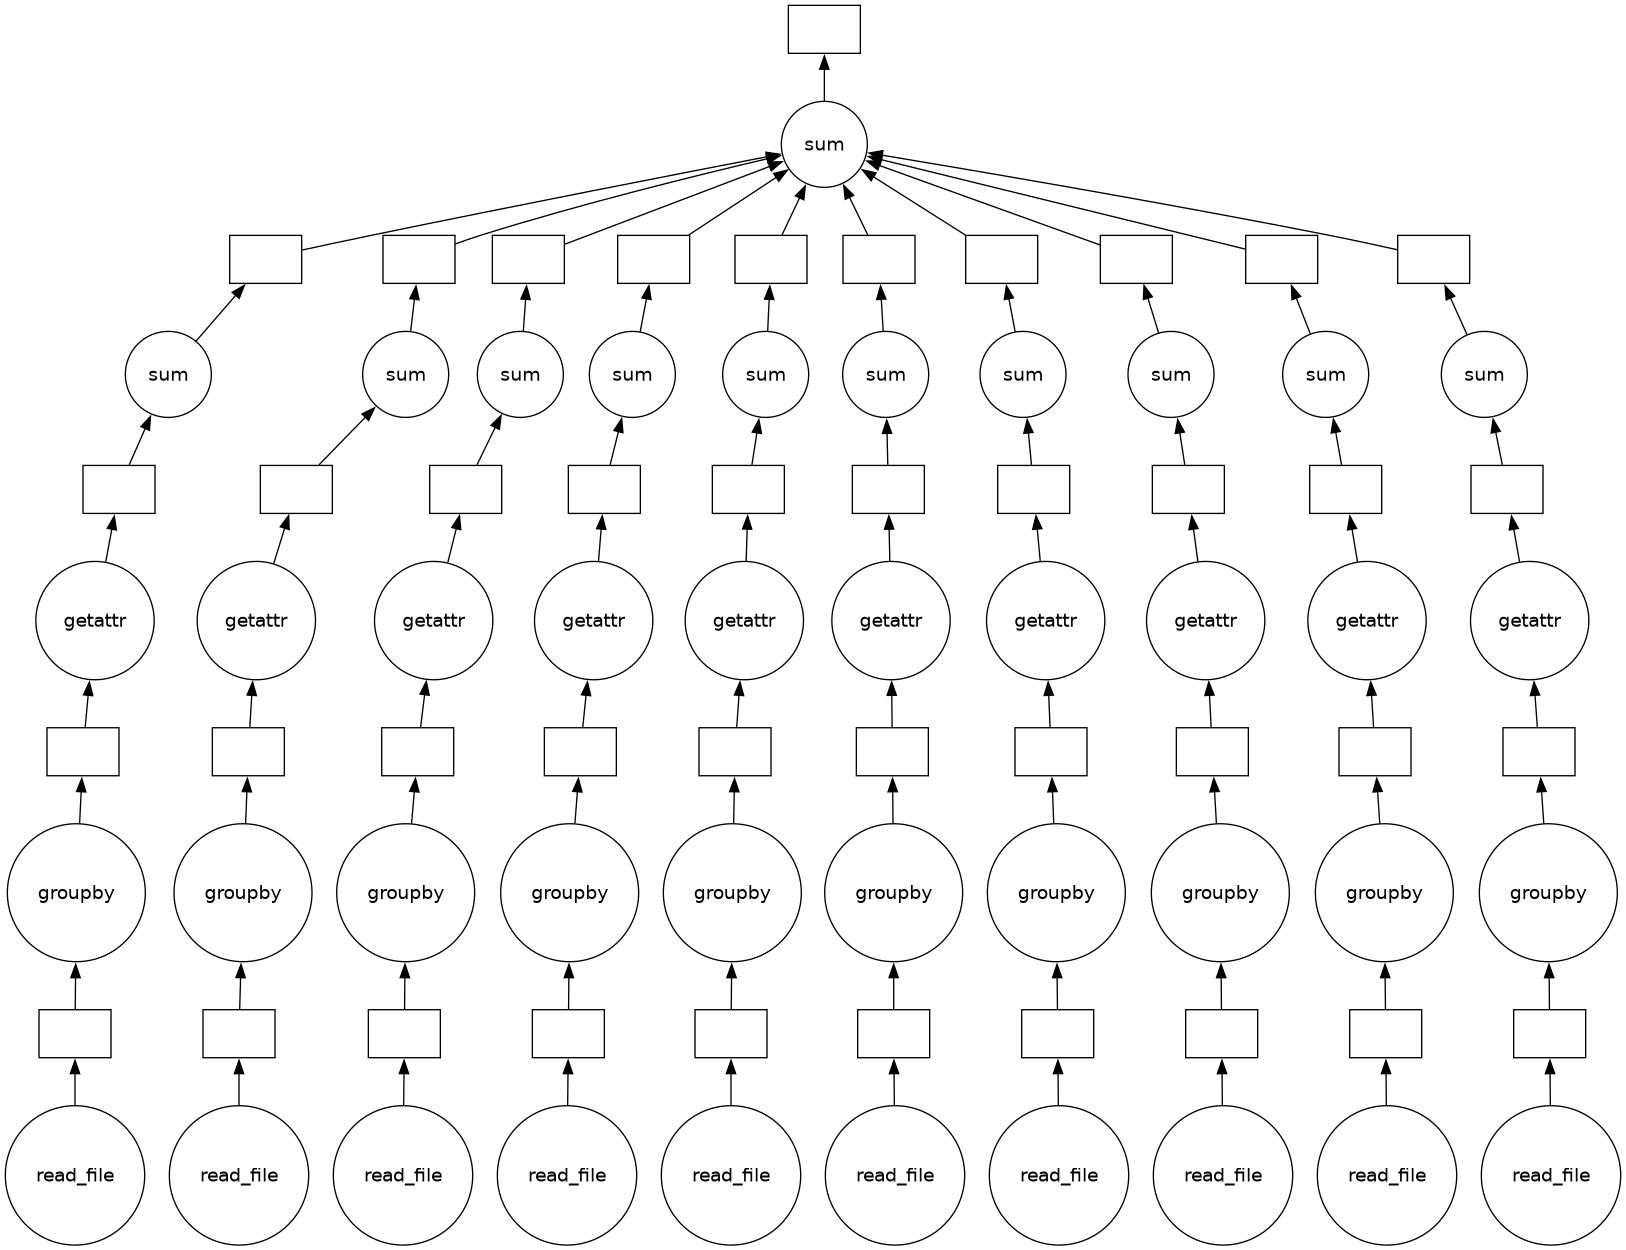

In [39]:
dask.delayed(sum)(sums).visualize()

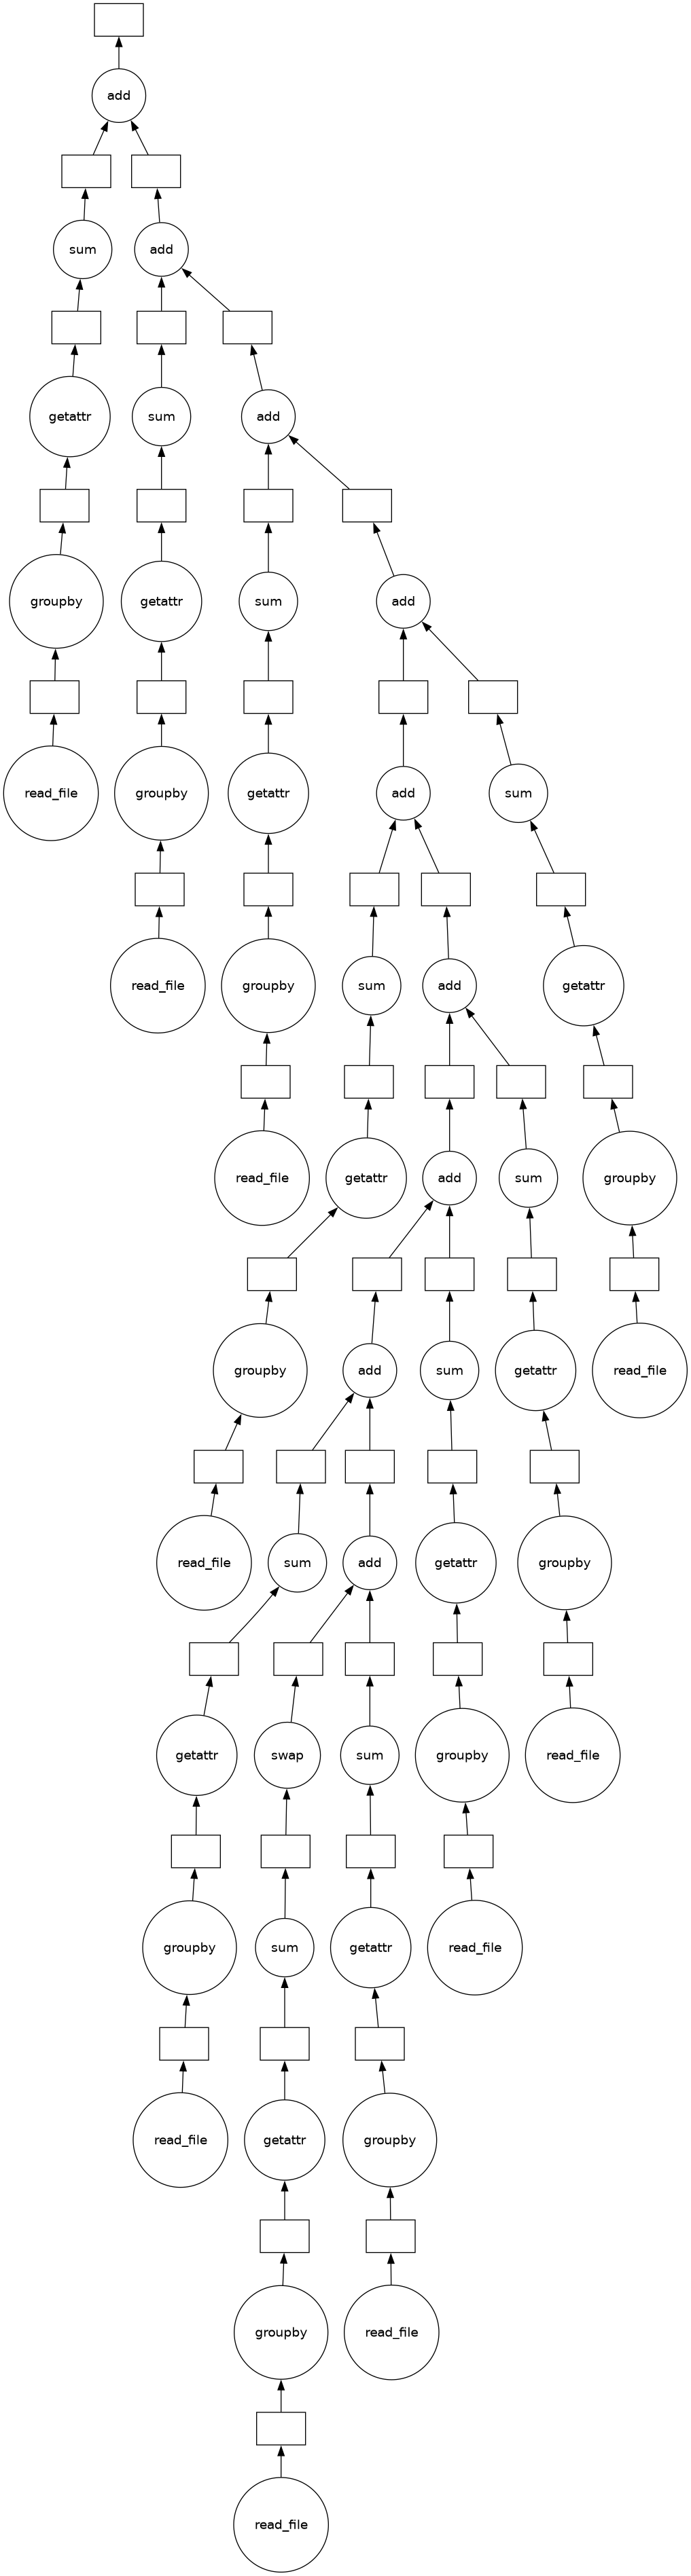

In [40]:
sum(sums).visualize()

In [41]:
client.close()